In [3]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import planar_utils
import testCases
import testCases_v2
%matplotlib inline

In [111]:
X , Y = planar_utils.load_planar_dataset()

In [5]:
print(X.shape , Y.shape)

(2, 400) (1, 400)


In [6]:
print(X[0,:].shape , Y[0,:200].shape)

(400,) (200,)


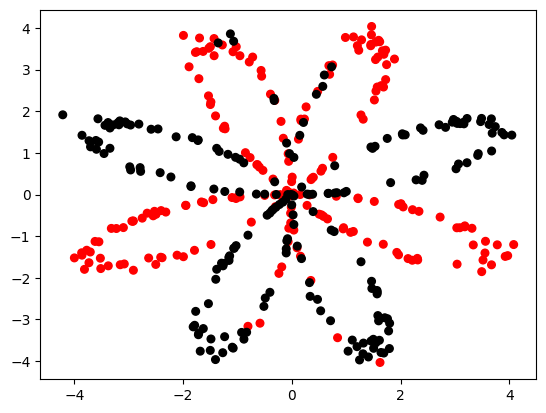

In [7]:
plt.scatter(X[0,:],X[1,:],c=Y,s=30,cmap=plt.cm.flag)

In [8]:
regressor = sklearn.linear_model.LogisticRegression()
regressor.fit(X.T,Y.T)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

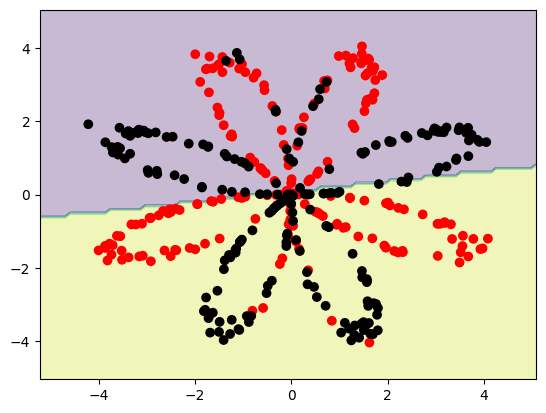

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(regressor , X.T ,response_method = "predict", alpha=0.3 )
disp.ax_.scatter(X[0,:],X[1,:],c=Y,cmap = plt.cm.flag)

In [11]:
regressor.score(X.T,Y.T)

0.47

In [12]:
def layer_sizes(X,Y):
  n0 = X.shape[0]
  n1 = 4
  n2 = Y.shape[0]
  return (n0,n1,n2)

In [13]:
X_assess, Y_assess = testCases.layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [14]:
def initialize_parameters(n0,n1,n2):

  W1 = np.random.randn(n1,n0) *0.01
  W2 = np.random.randn(n2,n1) *0.01
  b1 = np.zeros((n1,1))
  b2 = np.zeros((n2,1))
  parametrs = {
      "W1":W1,
      "W2":W2,
      "b1":b1,
      "b2":b2
  }
  return parametrs

In [15]:
np.random.seed(2)
n_x, n_h, n_y = testCases.initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [16]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [17]:
def forward_propagation(X,parameters):
  Z1 = np.dot(parameters["W1"],X) + parameters["b1"]
  A1 = np.tanh(Z1)
  assert(A1.shape == (parameters["b1"].shape[0],X.shape[1]))
  Z2 = np.dot(parameters['W2'],A1)+parameters["b2"]
  A2 = sigmoid(Z2)
  assert(A2.shape == (1, X.shape[1]))
  cache = {
      "Z1" :Z1,
      "A1" :A1,
      "Z2" :Z2,
      "A2" :A2
  }
  return A2, cache

In [18]:
X_assess, parameters = testCases_v2.forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [19]:
def compute_cost(y_hat,Y):
  temp = -(Y*np.log(y_hat))
  temp -= (1-Y)*np.log(1-y_hat)
  return np.sum(temp)*(1/Y.shape[1])

In [20]:
A2, Y_assess, parameters = testCases_v2.compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


In [74]:
def backward_propagation(param,cache,X,Y):
  m = Y.shape[1]
  A2 = cache["A2"]
  A1 = cache["A1"]
  Z1 = cache["Z1"]
  W2 = param["W2"]
  A1 = cache["A1"]
  dZ2 = A2 - Y
  dW2 = np.dot(dZ2,A1.T)/m
  db2 = np.sum(dZ2,axis=1,keepdims=True)/m
  dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
  db1 = np.sum(dZ1,axis=1,keepdims=True)/m
  dW1 = np.dot(dZ1,X.T)/m
  grad = {
      "dW1":dW1,
      "dW2":dW2,
      "db1":db1,
      "db2":db2
  }
  return grad

In [75]:
parameters, cache, X_assess, Y_assess = testCases_v2.backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [64]:
def update_parameters(param,grad,alpha):
  W1 = param["W1"] - alpha*grad["dW1"]
  b1 = param["b1"] - alpha*grad["db1"]
  W2 = param["W2"] - alpha*grad["dW2"]
  b2 = param["b2"] - alpha*grad["db2"]
  updated_param = {
      "W1":W1,
      "W2":W2,
      "b1":b1,
      "b2":b2
  }
  return updated_param

In [65]:
parameters, grads = testCases_v2.update_parameters_test_case()
parameters = update_parameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [115]:
def predict(param,X,prob=False):
  A2,cache = forward_propagation(X , param)
  if prob:
    return A2
  y_hat = (A2>=0.5)*1
  return y_hat

In [93]:
parameters, X_assess = testCases_v2.predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


In [186]:
def nn_model(X,Y,n_h,alpha,epochs , verbose ,X_t = None , Y_t =None):
  accuracy = sklearn.metrics.accuracy_score
  n0 ,n1,n2 = layer_sizes(X,Y)
  n1 = n_h
  param = initialize_parameters(n0,n1,n2)
  costs = []
  accuracies_train = []
  accuracies_test = []
  for i in range(epochs):
    A2,cache = forward_propagation(X,param)
    grad = backward_propagation(param,cache,X,Y)
    param = update_parameters(param,grad,alpha)
    y_hat_p = predict(param,X,True)
    y_hat = predict(param,X)
    cost = compute_cost(y_hat_p,Y)
    costs.append(cost)
    if Y_t:
      acc_test = accuracy(y_hat_p , Y_t)
    acc_train = sklearn.metrics.accuracy_score(y_hat.reshape(-1) , Y.reshape(-1))
    if Y_t:
      accuracies_test.append(acc_test)
    accuracies_train.append(acc_train)
    if verbose:
      print(f"iteration: {i}\ncost: {cost}\naccuracy: {acc_train}\n************************************")
  return param , costs , accuracies_train

In [148]:
X_assess, Y_assess = testCases_v2.nn_model_test_case()
np.random.seed(2)
parameters = nn_model(X_assess, Y_assess, 4, 1.02,epochs=10, verbose=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

iteration: 0
cost: 0.6669585697114102
accuracy: 0.6666666666666666
************************************
iteration: 1
cost: 0.6503728522320662
accuracy: 0.6666666666666666
************************************
iteration: 2
cost: 0.6348511106054918
accuracy: 0.6666666666666666
************************************
iteration: 3
cost: 0.6101656040876928
accuracy: 0.6666666666666666
************************************
iteration: 4
cost: 0.560699597459583
accuracy: 0.6666666666666666
************************************
iteration: 5
cost: 0.47253019189592393
accuracy: 0.6666666666666666
************************************
iteration: 6
cost: 0.3569525357686846
accuracy: 1.0
************************************
iteration: 7
cost: 0.2503442150755853
accuracy: 1.0
************************************
iteration: 8
cost: 0.1749328721100012
accuracy: 1.0
************************************
iteration: 9
cost: 0.1272953093587773
accuracy: 1.0
************************************
W1 = [[-0.18324826  

In [117]:
class model():
  def __init__( self , param):
    self.param = param
  def predict(self,X):
    return predict(self.param,X,True)

In [122]:
X_grid,Y_grid = np.meshgrid(
    np.linspace(-5,5,100),
    np.linspace(-5,5,100)
)

In [134]:
X_bond = np.stack([X_grid.ravel(),Y_grid.ravel()])

In [187]:
parameter , costs , acc  = nn_model(X,Y,4,1,2000,False)
#model_4n = model(parameter)
# disp = DecisionBoundaryDisplay.from_estimator(model_4n , X , plot_method="contourf" ,response_method="predict")
# disp.ax_.scatter(X[0,:],X[1,:],c=Y,cmap = plt.cm.flag)

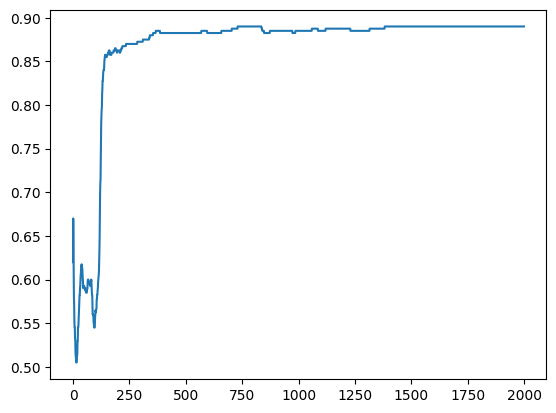

In [189]:
plt.plot(acc)

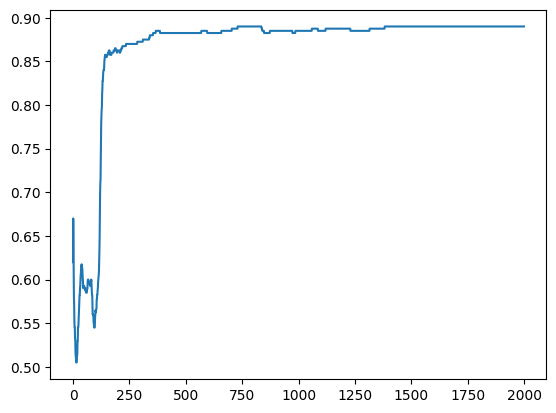

In [190]:
plt.plot(acc)

In [177]:
X_bon_pred = predict(parameter,X_bond)

In [178]:
disp = DecisionBoundaryDisplay(xx0 = X_grid , xx1 = Y_grid ,response = X_bon_pred.reshape(100,100))

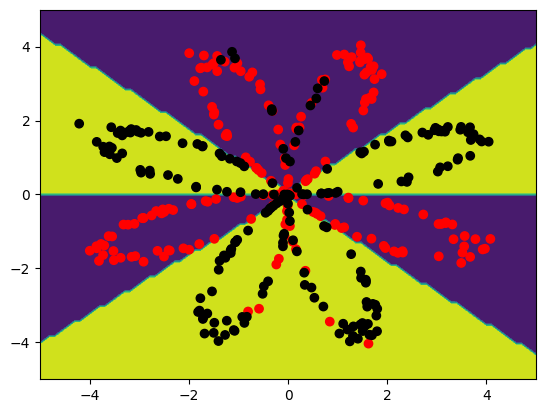

In [179]:
disp.plot()
disp.ax_.scatter(X[0,:],X[1,:],c=Y,cmap=plt.cm.flag)

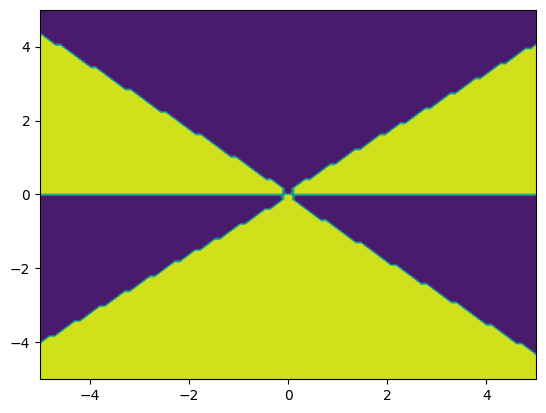

In [182]:
plt.contourf( X_grid , Y_grid , X_bon_pred.reshape(100,100) )

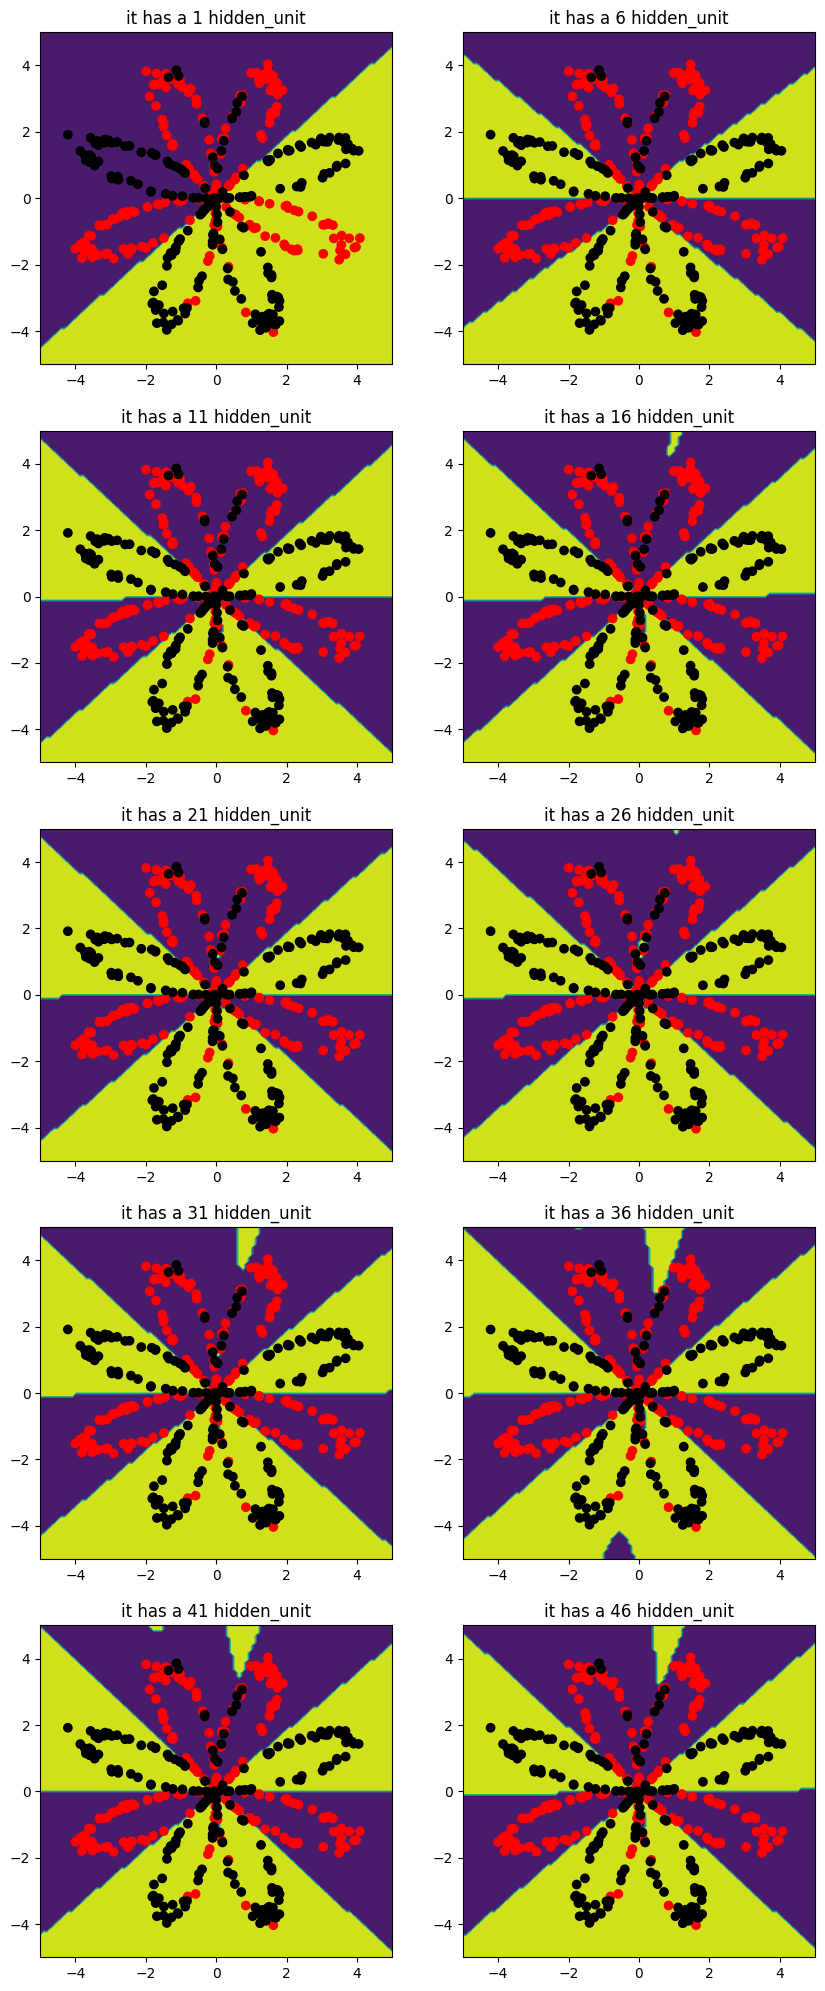

In [193]:
fig , ax = plt.subplots(5,2,figsize = (10,25))
n_h = 1
for i in range(5):
  for j in range(2):
    parameter , costs , acc= nn_model(X,Y,n_h,1.2,3000,False)
    X_bon_pred = predict(parameter,X_bond)
    ax[i,j].contourf( X_grid , Y_grid , X_bon_pred.reshape(100,100) )
    ax[i,j].scatter(X[0,:],X[1,:],c=Y,cmap=plt.cm.flag)
    ax[i,j].set_title(f"it has a {n_h} hidden_unit")
    n_h += 5



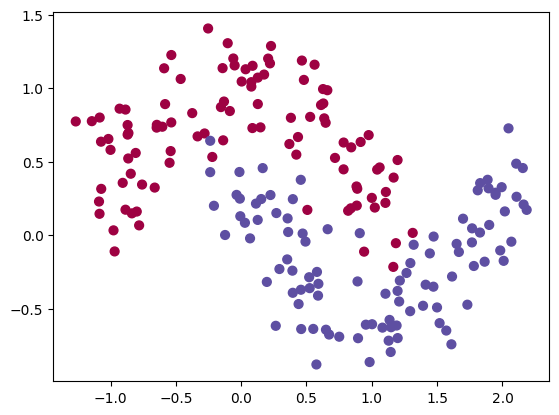

In [194]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = planar_utils.load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

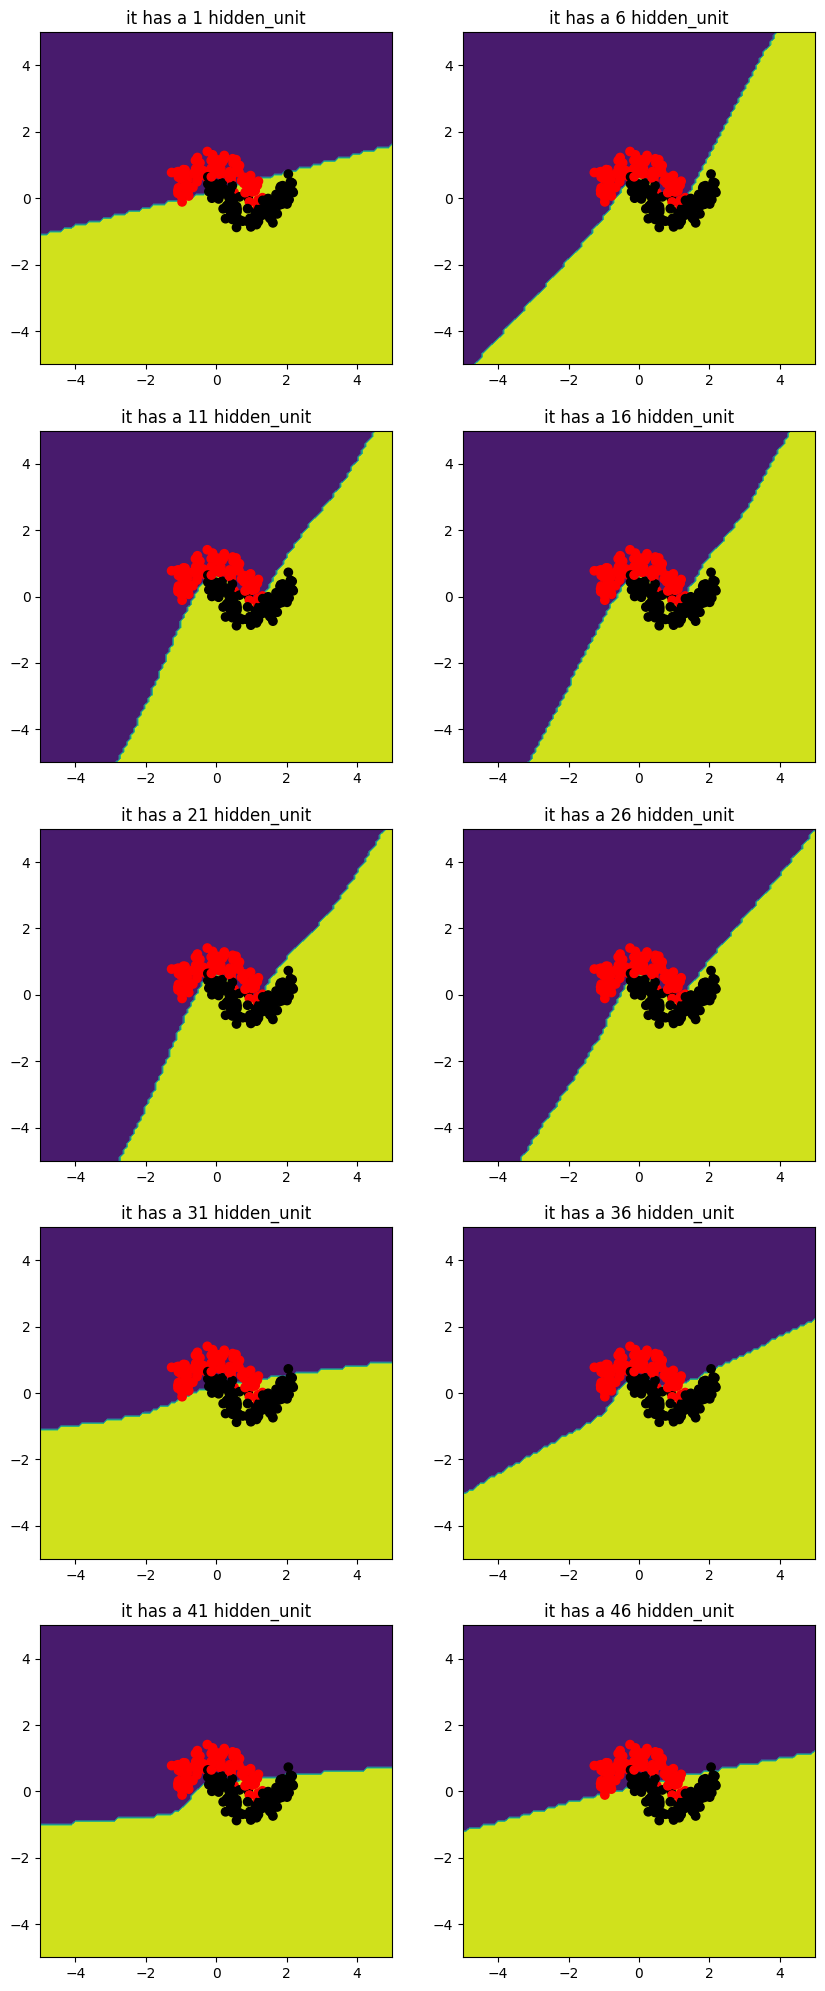

In [195]:
fig , ax = plt.subplots(5,2,figsize = (10,25))
n_h = 1
for i in range(5):
  for j in range(2):
    parameter , costs , acc= nn_model(X,Y,n_h,1.2,3000,False)
    X_bon_pred = predict(parameter,X_bond)
    ax[i,j].contourf( X_grid , Y_grid , X_bon_pred.reshape(100,100) )
    ax[i,j].scatter(X[0,:],X[1,:],c=Y,cmap=plt.cm.flag)
    ax[i,j].set_title(f"it has a {n_h} hidden_unit")
    n_h += 5


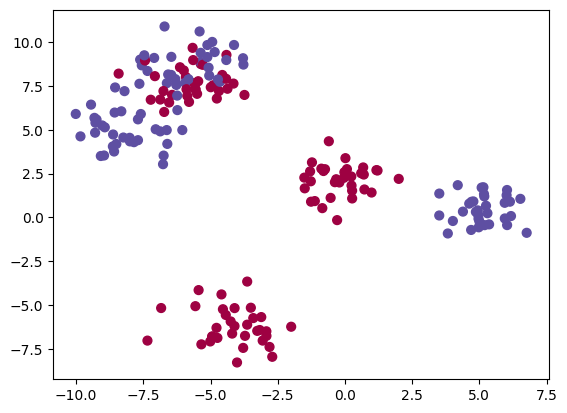

In [197]:
dataset = "blobs"


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [199]:
X_grid,Y_grid = np.meshgrid(
    np.linspace(-11,11,100),
    np.linspace(-11,11,100)
)

In [200]:
X_bond = np.stack([X_grid.ravel(),Y_grid.ravel()])

In [201]:
X_bon_pred = predict(parameter,X_bond)

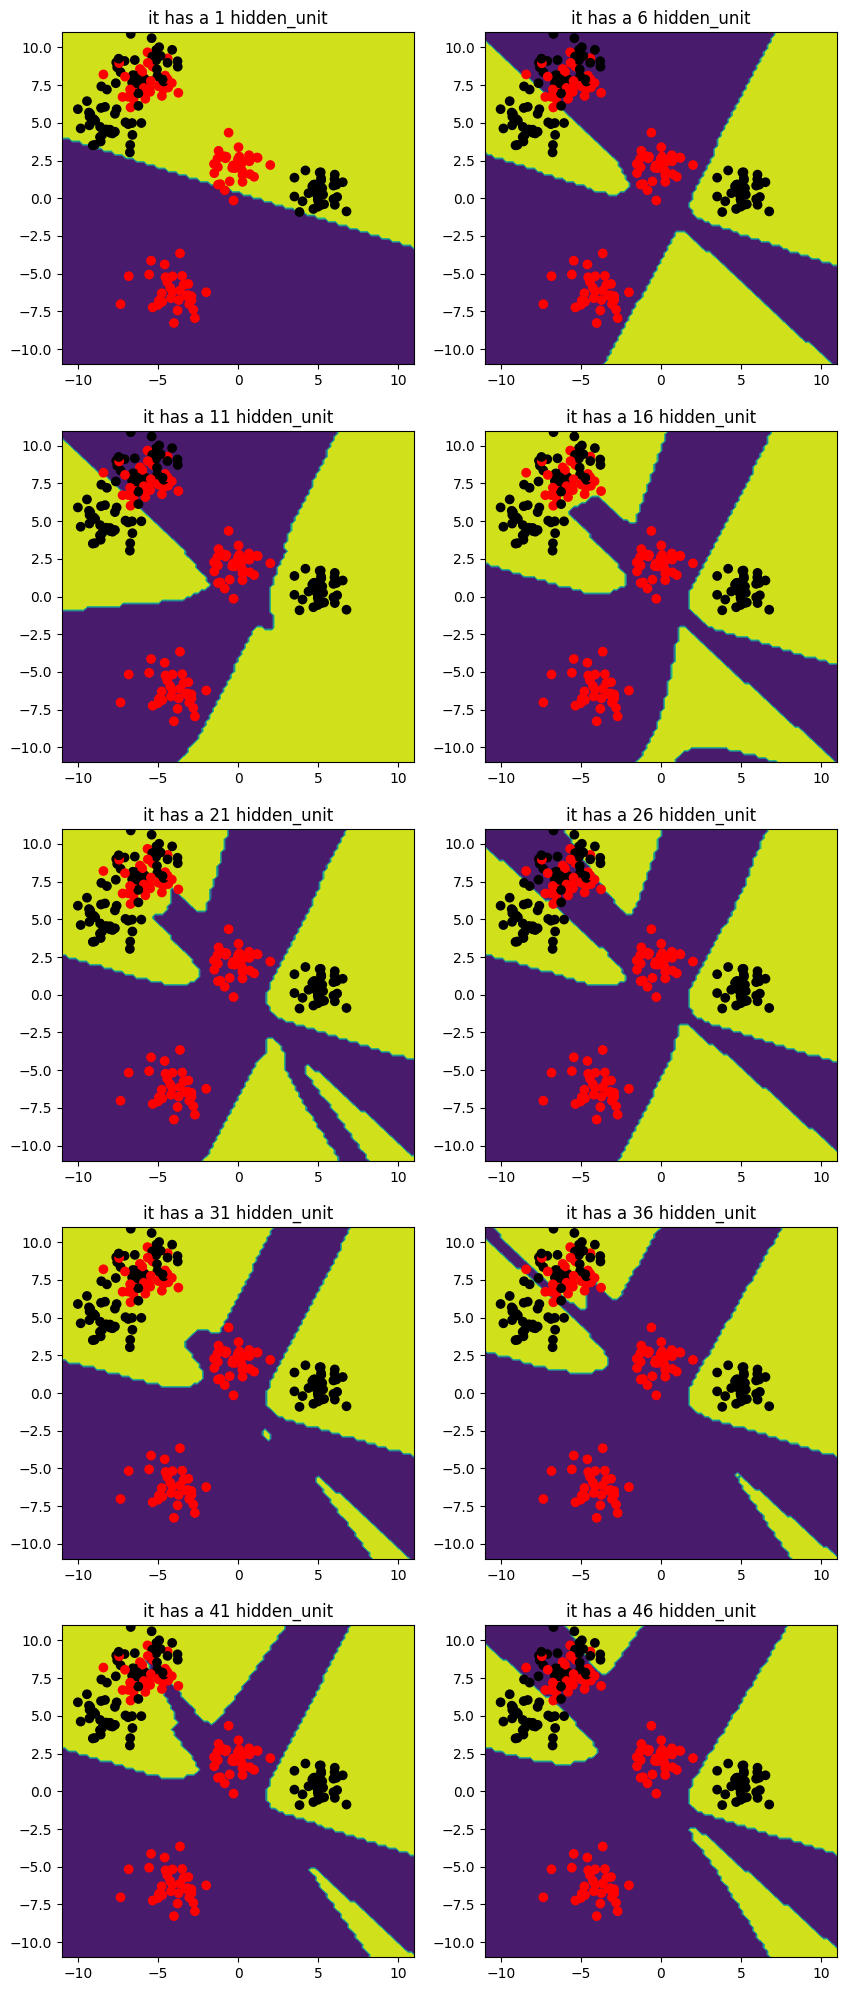

In [203]:
fig , ax = plt.subplots(5,2,figsize = (10,25))
n_h = 1
for i in range(5):
  for j in range(2):
    parameter , costs , acc= nn_model(X,Y,n_h,1.2,3000,False)
    X_bon_pred = predict(parameter,X_bond)
    ax[i,j].contourf( X_grid , Y_grid , X_bon_pred.reshape(100,100) )
    ax[i,j].scatter(X[0,:],X[1,:],c=Y,cmap=plt.cm.flag)
    ax[i,j].set_title(f"it has a {n_h} hidden_unit")
    n_h += 5